In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv('iris.csv')

In [18]:
dataset

Sepal Length  Sepal Width  Petal Length  Petal Width         Species
0             5.1          3.5           NaN          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [19]:
dataset.head()

Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           NaN          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [20]:
dataset.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    1
Petal Width     0
Species         0
dtype: int64

In [25]:
new_dataset=dataset.dropna()

In [26]:
new_dataset.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [21]:
dataset.skew()

C:\Users\PRAMOD KUMAR\AppData\Local\Temp\ipykernel_19392\4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Sepal Length    0.314911
Sepal Width     0.334053
Petal Length   -0.289459
Petal Width    -0.104997
dtype: float64

In [22]:
dataset.kurtosis()

C:\Users\PRAMOD KUMAR\AppData\Local\Temp\ipykernel_19392\1266381168.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.kurtosis()


Sepal Length   -0.552064
Sepal Width     0.290781
Petal Length   -1.385003
Petal Width    -1.339754
dtype: float64

<AxesSubplot:xlabel='Species', ylabel='Petal Length'>

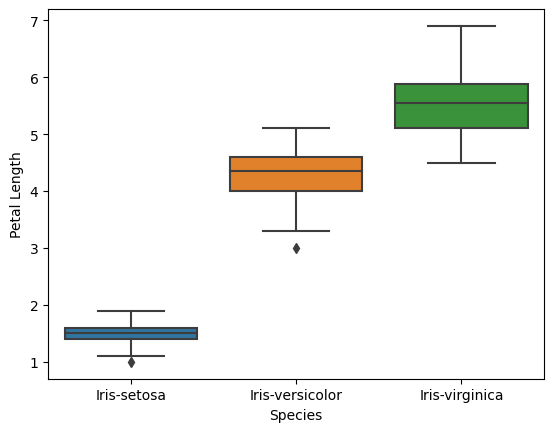

In [24]:
sns.boxplot(x="Species", y="Petal Length", data=dataset)

<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>

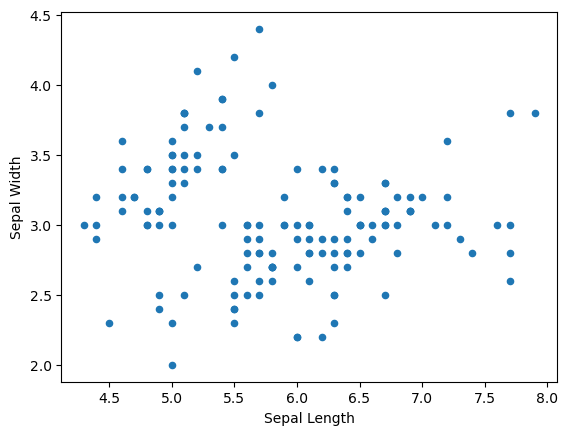

In [27]:
new_dataset.plot(kind= "scatter", x="Sepal Length", y="Sepal Width")

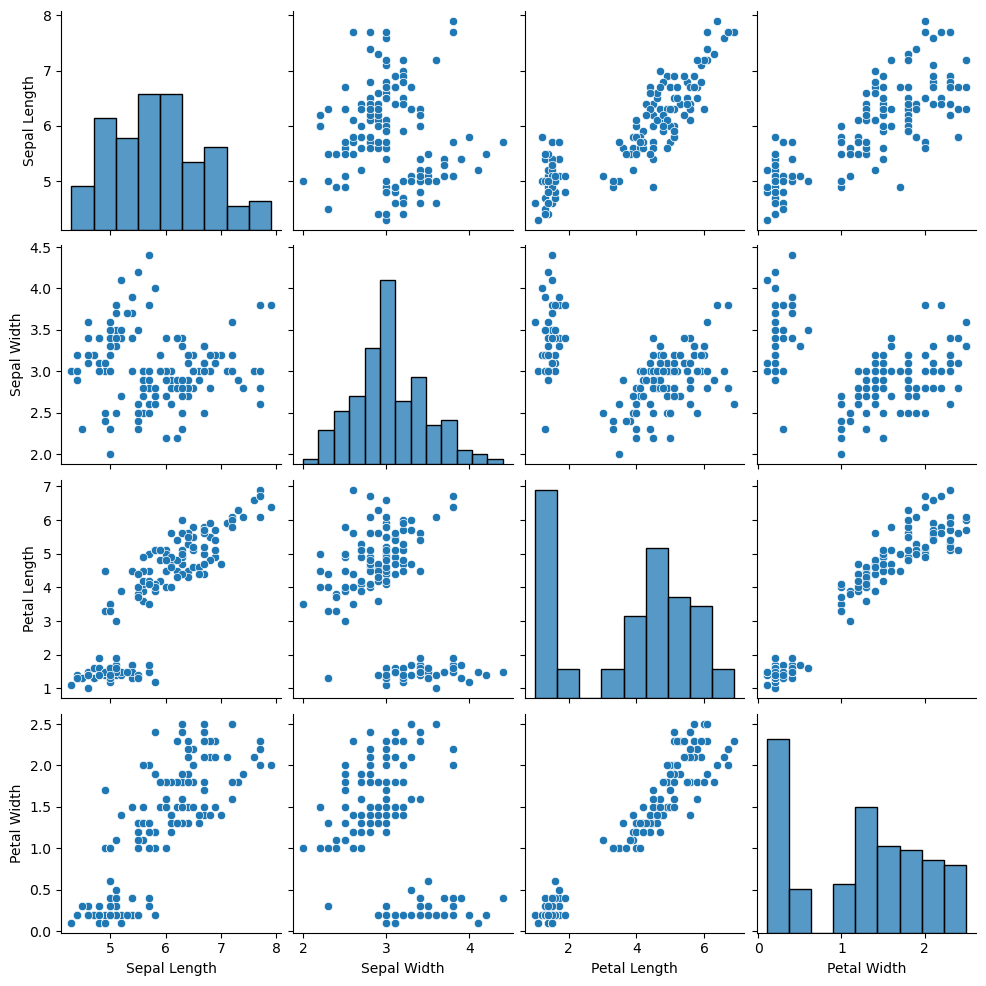

In [28]:
sns.pairplot(new_dataset)

In [29]:
new_dataset.corr()

Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      1.000000    -0.103784      0.871283     0.816971
Sepal Width      -0.103784     1.000000     -0.415218    -0.350733
Petal Length      0.871283    -0.415218      1.000000     0.962314
Petal Width       0.816971    -0.350733      0.962314     1.000000

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
X = new_dataset.iloc[:, :-1].values
Y = new_dataset.iloc[:, -1].values

In [40]:
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [43]:
y_predictions = classifier.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print((accuracy_score(y_test, y_predictions)*100))

90.0


In [47]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  5]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.62      0.77         8

       accuracy                           0.90        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30

